Given a curve on a circle, the two end points are (x1, y1) and (x2, y2), and the middle point is
(xm, ym). Please implement a python function to calculate the center point of the circle (xo, yo).

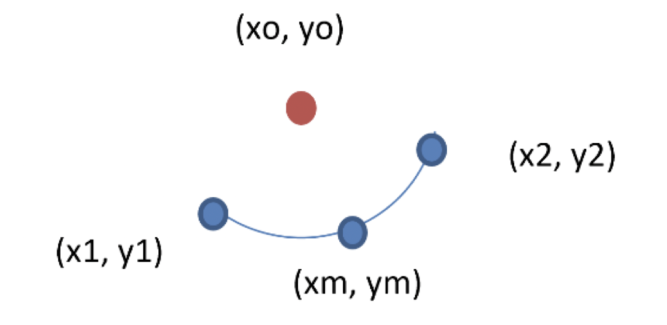

In [270]:
def findBisector(point_a, point_b):
    # extracting point values
    (x_a, y_a) = point_a
    (x_b, y_b) = point_b

    # slope of line segment joining (x_a, y_a) and (x_b, y_b)
    m_ab = (y_b - y_a)/(x_b - x_a)
    
    # slope of line perpendicular to segment
    m_bisector_ab = -1/(m_ab)

    # equation for line passing through midpoint of two points
    # y = (m_bisector_ab) * x + (c_bisector_ab) to find c?
    c_bisector_ab = (y_a + y_b)/2 - (m_bisector_ab) * (x_a + x_b)/2

    return m_bisector_ab, c_bisector_ab

In [271]:
def findIntersectionBetweenTwoLines(line_a, line_b):
    # extracting line slope and constant values
    m_a, c_a = line_a
    m_b, c_b = line_b

    # m_a(x_inter) + c_a = m_b(x_inter) + c_b
    x_inter = (c_a - c_b)/(m_b - m_a)
    # y_inter = m_a(x_inter) + c_a
    y_inter = m_a * ((c_a - c_b)/(m_b - m_a)) + c_a

    return x_inter, y_inter

In [272]:
def findCentre(point_0, point_1, point_m):
    # extracting point values
    (x_0, y_0) = point_0
    (x_1, y_1) = point_1
    (x_m, y_m) = point_m
    
    # locus of points equidistant from (x0, y0) and (x1, y1)
    # is the perpendicular bisector of the two points
    m_bisector_01, c_bisector_01 = findBisector(point_0, point_1)
    line_bisector_01 = m_bisector_01, c_bisector_01

    # locus of points equidistant from (x0, y0) and (xm, ym)
    # is the perpendicular bisector of the two points
    m_bisector_0m, c_bisector_0m = findBisector(point_0, point_m)
    line_bisector_0m = m_bisector_0m, c_bisector_0m

    # for a point to lie on both of these lines, it should be at their intersection
    x_center, y_center = findIntersectionBetweenTwoLines(line_bisector_01, line_bisector_0m)

    return x_center, y_center

In [273]:
def findDistance(point_a, point_b):
    # extracting point values
    (x_a, y_a) = point_a
    (x_b, y_b) = point_b

    distance = pow(pow(x_b - x_a, 2) + pow(y_b - y_a, 2), 0.5)
    return distance

In [284]:
# Test Case 1

x_0, y_0 = (23, 5); x_1, y_1 = (28, 15); x_m, y_m = (50, 52)
x_center, y_center = findCentre((x_0, y_0), (x_1, y_1), (x_m, y_m))
print("To check that the point found", round(x_center, 3), round(y_center, 3), "is the center : ")
print("Distance to point_0", round(findDistance((x_center, y_center), (x_0, y_0)), 3))
print("Distance to point_1", round(findDistance((x_center, y_center), (x_1, y_1)), 3))
print("Distance to point_m", round(findDistance((x_center, y_center), (x_m, y_m)), 3))
print("We observe that the supposed center is equidistant from all three given points.")

To check that the point found 358.786 -156.643 is the center : 
Distance to point_0 372.667
Distance to point_1 372.667
Distance to point_m 372.667
We observe that the supposed center is equidistant from all three given points.


In [285]:
# Compressed Code

def findCentre(point_0, point_1, point_m):
    # extracting point values
    (x_0, y_0) = point_0
    (x_1, y_1) = point_1
    (x_m, y_m) = point_m
    
    # locus of points equidistant from (x0, y0) and (x1, y1)
    # is the perpendicular bisector of the two points

    # slope of line segment joining (x_0, y_1) and (x_1, y_1)
    m_01 = (y_1 - y_0)/(x_1 - x_0)
    
    # line perpendicular to segment 0-1
    m_bisector_01 = -1/(m_01)
    c_bisector_01 = (y_0 + y_1)/2 - (m_bisector_01) * (x_0 + x_1)/2


    # locus of points equidistant from (x0, y0) and (x1, y1)
    # is the perpendicular bisector of the two points

    # slope of line segment joining (x_0, y_1) and (x_m, y_m)
    m_0m = (y_m - y_0)/(x_m - x_0)
    
    # line perpendicular to segment 0-m
    m_bisector_0m = -1/(m_0m)
    c_bisector_0n = (y_0 + y_m)/2 - (m_bisector_0m) * (x_0 + x_m)/2


    # for a point to lie on both of these lines, it should be at their intersection
    x_center = (c_bisector_01 - c_bisector_0n)/(m_bisector_0m - m_bisector_01)
    y_center = m_bisector_01 * ((c_bisector_01 - c_bisector_0n)/(m_bisector_0m - m_bisector_01)) + c_bisector_01

    return x_center, y_center

In [286]:
# Test Case 1

x_0, y_0 = (15, 25); x_1, y_1 = (35, 23); x_m, y_m = (18, 11)
x_center, y_center = findCentre((x_0, y_0), (x_1, y_1), (x_m, y_m))
print("To check that the point found", round(x_center, 3), round(y_center, 3), "is the center : ")
print("Distance to point_0", round(findDistance((x_center, y_center), (x_0, y_0)), 3))
print("Distance to point_1", round(findDistance((x_center, y_center), (x_1, y_1)), 3))
print("Distance to point_m", round(findDistance((x_center, y_center), (x_m, y_m)), 3))
print("We observe that the supposed center is equidistant from all three given points.")

To check that the point found 24.573 19.73 is the center : 
Distance to point_0 10.928
Distance to point_1 10.928
Distance to point_m 10.928
We observe that the supposed center is equidistant from all three given points.


Ultrasound image augmentation: list data augmentation methods that can be used for ultrasound image augmentation; generate the augmented versions of test 1.png.


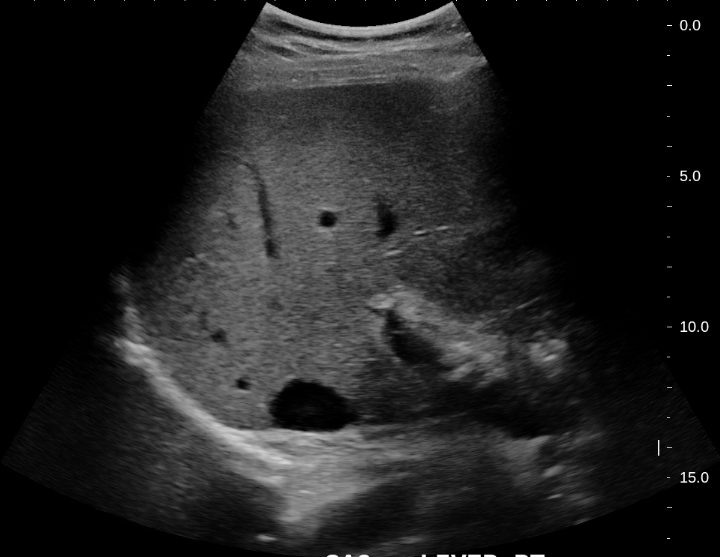

In [287]:
import numpy as np
import cv2

img = cv2.imread('/content/test 1.png')
img = np.array(img[:, :, 0]/255.0)

In [289]:
img.shape, np.min(img), np.max(img)

((557, 720), 0.0, 1.0)

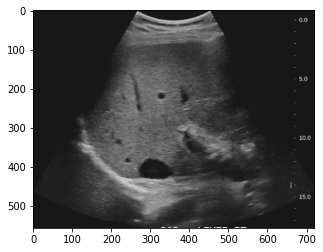

In [290]:
import matplotlib.pyplot as plt
plt.imshow(img, vmin = -0.1, cmap = 'gray')

In [291]:
import cv2 
import imutils

def augmentFlipRotate(image, text = True):
    rot_angle = random.random()
    augmented_image = imutils.rotate(image, angle = 30 * (rot_angle - 0.5))
    if (text == True):
        print("Rotated to : ", round(30 * (rot_angle - 0.5), 3), "degrees.")
    flip_prob = random.random()
    if (flip_prob > 0.5):
        augmented_image = cv2.flip(augmented_image, 1)
        if (text == True):
            print("Flipped")
    return augmented_image

Log for Augmentation 1 : 
Rotated to :  -2.058 degrees.
Flipped
Log for Augmentation 2 : 
Rotated to :  7.241 degrees.
Flipped
Log for Augmentation 3 : 
Rotated to :  -8.846 degrees.
Flipped


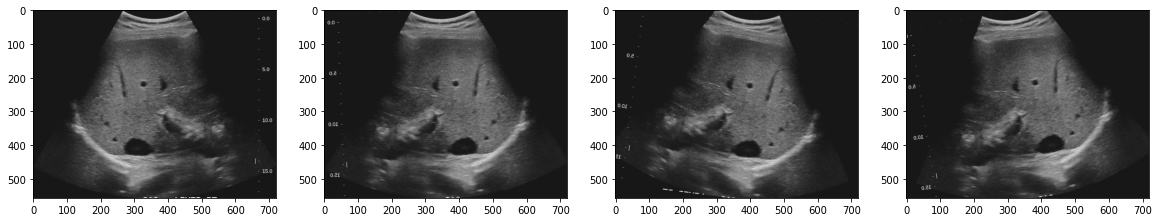

In [297]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img, vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,2)
print("Log for Augmentation 1 : ")
ax2.imshow(augmentFlipRotate(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,3)
print("Log for Augmentation 2 : ")
ax2.imshow(augmentFlipRotate(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,4)
print("Log for Augmentation 3 : ")
ax2.imshow(augmentFlipRotate(img), vmin = -0.1, cmap = 'gray')

In [300]:
def augmentCompleteBlurNoiseSNR(image, text = True):
  
    augmented_image = image.copy()
    kernel_size = random.randint(5, 14)
    augmented_image = np.copy(augmented_image)
    
    blur_prob = random.random()
    if (blur_prob > 0.5):
        if (text == True):
            print("Blurred Complete Image")
        augmented_image = cv2.blur(augmented_image, (kernel_size, kernel_size))
    
    noise_prob = random.random()
    if (noise_prob > 0.5):
        if (text == True):
            print("Added Noise to Complete Image")
        augmented_image = augmented_image + np.random.random((len(image), len(image[0])))/5.0

    scaler = MinMaxScaler()
    scaler.fit(augmented_image.flatten().reshape(-1, 1))
    augmented_image = scaler.transform(augmented_image.flatten().reshape(-1, 1)).reshape((len(augmented_image), len(augmented_image[0])))
    randomized_intensity = random.random()
    sign = random.random()
    if (sign < 0.5):
        sign = -1
    else:
        sign = 1
    augmented_image = np.power(augmented_image, 1 + sign * randomized_intensity/5.0)
    return augmented_image

Log for Augmentation 1 : 
Added Noise to Complete Image
Log for Augmentation 2 : 
Blurred Complete Image
Added Noise to Complete Image
Log for Augmentation 3 : 
Blurred Complete Image
Added Noise to Complete Image


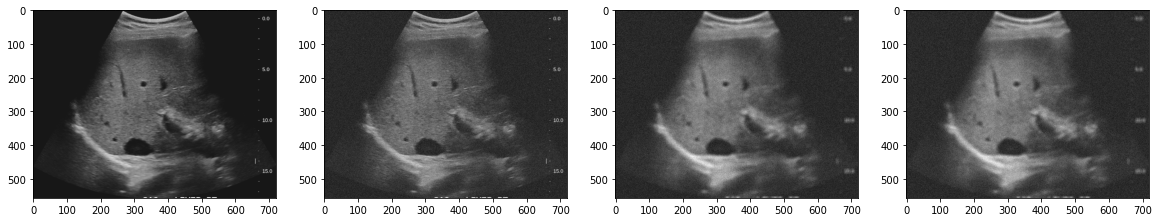

In [302]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img, vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,2)
print("Log for Augmentation 1 : ")
ax2.imshow(augmentCompleteBlurNoiseSNR(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,3)
print("Log for Augmentation 2 : ")
ax2.imshow(augmentCompleteBlurNoiseSNR(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,4)
print("Log for Augmentation 3 : ")
ax2.imshow(augmentCompleteBlurNoiseSNR(img), vmin = -0.1, cmap = 'gray')

In [367]:
def augmentCompleteBrightnessContrast(image, text = True):
    augmented_image = image.copy()
    brightness_param = random.random()/5.0
    contrast_param = 0.5 + random.random()
    augmented_image = contrast_param * augmented_image + brightness_param
    if (text == True):
        print("Contrast to : ", round(contrast_param, 3))
        print("Brightness by : ", round(brightness_param, 3))
    return augmented_image

Log for Augmentation 1 : 
Contrast to :  1.472
Brightness by :  0.19
Log for Augmentation 2 : 
Contrast to :  1.437
Brightness by :  0.13
Log for Augmentation 3 : 
Contrast to :  1.072
Brightness by :  0.103


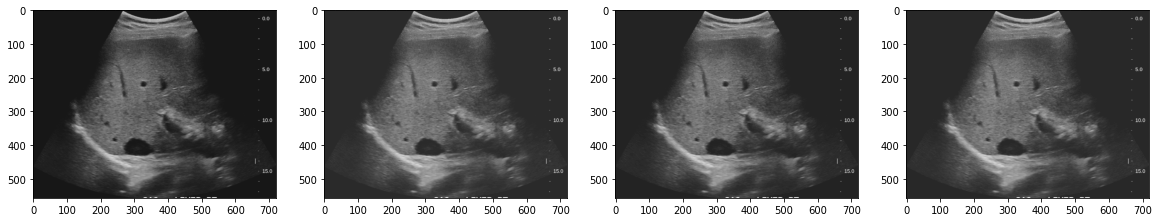

In [369]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img, vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,2)
print("Log for Augmentation 1 : ")
ax2.imshow(augmentCompleteBrightnessContrast(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,3)
print("Log for Augmentation 2 : ")
ax2.imshow(augmentCompleteBrightnessContrast(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,4)
print("Log for Augmentation 3 : ")
ax2.imshow(augmentCompleteBrightnessContrast(img), vmin = -0.1, cmap = 'gray')

Creating Gaussian Filter, used to apply Cut - based augmentations smoothly



In [105]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import random
from skimage.measure import label
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler

from scipy.interpolate import RegularGridInterpolator
def regrid(data, out_x, out_y):
    m = max(data.shape[0], data.shape[1])
    y = np.linspace(0, 1.0/m, data.shape[0])
    x = np.linspace(0, 1.0/m, data.shape[1])
    interpolating_function = RegularGridInterpolator((y, x), data)
    yv, xv = np.meshgrid(np.linspace(0, 1.0/m, out_y), np.linspace(0, 1.0/m, out_x))
    return interpolating_function((xv, yv))
    
def gkern(kernlen=100, nsig=1):
    """Returns a 2D Gaussian kernel."""
    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

k_2d = gkern(200, 1)

scaler = MinMaxScaler()
scaler.fit(k_2d.flatten().reshape(-1, 1))
k_2d = scaler.transform(k_2d.flatten().reshape(-1, 1)).reshape((200, 200))

In [303]:
import random
import cv2 
import scipy 

def augmentCutBlur(image, text = True):

    y_coord = len(image)
    x_coord = len(image[0])

    y_size = random.randint(y_coord//3, y_coord//2)
    x_size = random.randint(x_coord//3, x_coord//2)

    y_rand = random.randint(0, y_coord - y_size)
    x_rand = random.randint(0, y_coord - y_size)
    
    if (text == True):
        print("Blurred Region : ", "y : ", y_rand, "-> ", y_rand + y_size, "x : ", x_rand, "-> ",x_rand + x_size)
    kernel_size = random.randint(5, 14)
    to_be_blurred = np.copy(image[y_rand : y_rand + y_size, x_rand : x_rand + x_size])
    to_be_blurred = cv2.blur(to_be_blurred, (kernel_size, kernel_size))
    
    k_2d = gkern(200, 1)

    scaler = MinMaxScaler()
    scaler.fit(k_2d.flatten().reshape(-1, 1))
    k_2d = scaler.transform(k_2d.flatten().reshape(-1, 1)).reshape((200, 200))

    k_2d = regrid(k_2d, y_size, x_size)
    augmented_image = image.copy()
    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] = (1 - k_2d) * augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size]
    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] += to_be_blurred.copy() * k_2d
    # augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] = to_be_blurred.copy()

    return augmented_image

Log for Augmentation 1 : 
Blurred Region :  y :  4 ->  225 x :  191 ->  490
Log for Augmentation 2 : 
Blurred Region :  y :  125 ->  378 x :  21 ->  315
Log for Augmentation 3 : 
Blurred Region :  y :  301 ->  538 x :  300 ->  606


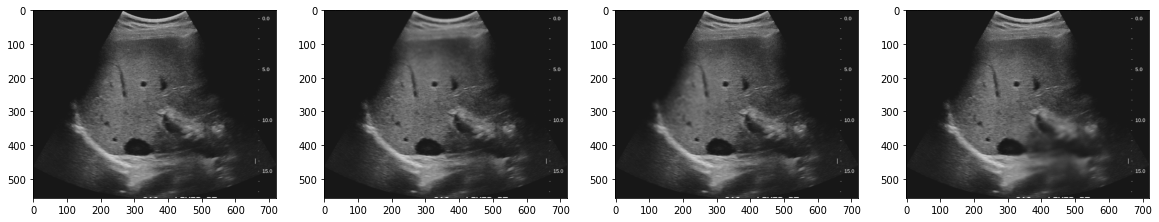

In [306]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img, vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,2)
print("Log for Augmentation 1 : ")
ax2.imshow(augmentCutBlur(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,3)
print("Log for Augmentation 2 : ")
ax2.imshow(augmentCutBlur(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,4)
print("Log for Augmentation 3 : ")
ax2.imshow(augmentCutBlur(img), vmin = -0.1, cmap = 'gray')

In [311]:
def augmentCutNoise(image, text = True):
    y_coord = len(image)
    x_coord = len(image[0])

    y_size = random.randint(y_coord//3, y_coord//2)
    x_size = random.randint(x_coord//3, x_coord//2)

    y_rand = random.randint(0, y_coord - y_size)
    x_rand = random.randint(0, y_coord - y_size)
    
    if (text == True):
        print("Added Noise to Region : ", "y : ", y_rand, "-> ", y_rand + y_size, "x : ", x_rand, "-> ",x_rand + x_size)
    to_add_noise = np.copy(image[y_rand : y_rand + y_size, x_rand : x_rand + x_size])
    to_add_noise = to_add_noise + np.random.random((y_size, x_size))/5.0
    
    k_2d = gkern(200, 1)

    scaler = MinMaxScaler()
    scaler.fit(k_2d.flatten().reshape(-1, 1))
    k_2d = scaler.transform(k_2d.flatten().reshape(-1, 1)).reshape((200, 200))

    k_2d = regrid(k_2d, y_size, x_size)
    
    augmented_image = image.copy()
    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] = (1 - k_2d) * augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size]
    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] += to_add_noise.copy() * k_2d
    # augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] = to_add_noise.copy()

    return augmented_image

Log for Augmentation 1 : 
Added Noise to Region :  y :  278 ->  525 x :  73 ->  431
Log for Augmentation 2 : 
Added Noise to Region :  y :  177 ->  397 x :  317 ->  663
Log for Augmentation 3 : 
Added Noise to Region :  y :  53 ->  305 x :  145 ->  484


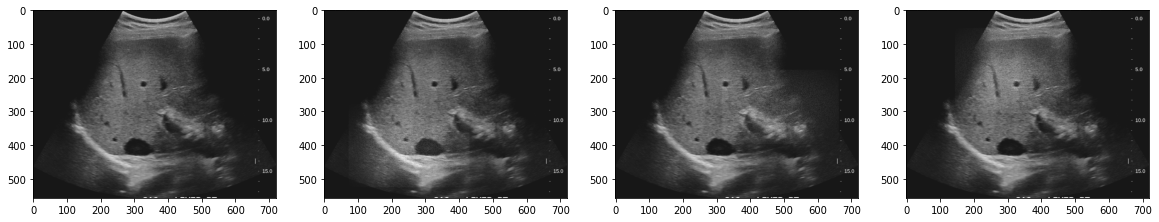

In [312]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img, vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,2)
print("Log for Augmentation 1 : ")
ax2.imshow(augmentCutNoise(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,3)
print("Log for Augmentation 2 : ")
ax2.imshow(augmentCutNoise(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,4)
print("Log for Augmentation 3 : ")
ax2.imshow(augmentCutNoise(img), vmin = -0.1, cmap = 'gray')

In [313]:
def augmentCutDenoise(image, text = True):

    y_coord = len(image)
    x_coord = len(image[0])

    y_size = random.randint(y_coord//3, y_coord//2)
    x_size = random.randint(x_coord//3, x_coord//2)

    y_rand = random.randint(0, y_coord - y_size)
    x_rand = random.randint(0, y_coord - y_size)
    
    if (text == True):
        print("Denoised Region : ", "y : ", y_rand, "-> ", y_rand + y_size, "x : ", x_rand, "-> ",x_rand + x_size)
    to_remove_noise = np.copy(image[y_rand : y_rand + y_size, x_rand : x_rand + x_size])
    # size_of_filter = random.randint(3, 8)
    to_remove_noise = cv2.medianBlur(to_remove_noise.astype('float32'), 5)
    
    k_2d = gkern(200, 1)

    scaler = MinMaxScaler()
    scaler.fit(k_2d.flatten().reshape(-1, 1))
    k_2d = scaler.transform(k_2d.flatten().reshape(-1, 1)).reshape((200, 200))

    k_2d = regrid(k_2d, y_size, x_size)
    
    augmented_image = image.copy()
    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] = (1 - k_2d) * augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size]
    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] += to_remove_noise.copy() * k_2d
    # augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] = to_remove_noise.copy()

    return augmented_image

Log for Augmentation 1 : 
Denoised Region :  y :  24 ->  223 x :  328 ->  596
Log for Augmentation 2 : 
Denoised Region :  y :  159 ->  407 x :  28 ->  324
Log for Augmentation 3 : 
Denoised Region :  y :  32 ->  290 x :  221 ->  469


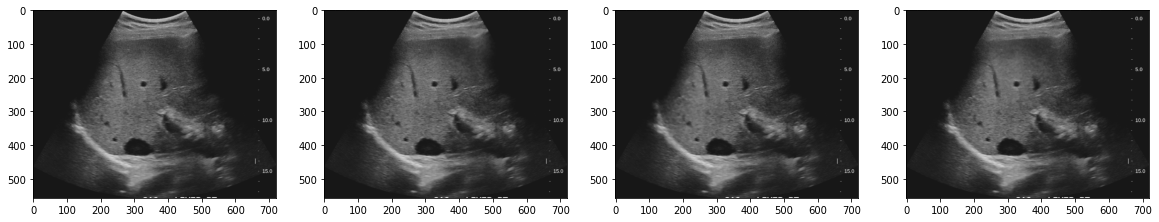

In [314]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img, vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,2)
print("Log for Augmentation 1 : ")
ax2.imshow(augmentCutDenoise(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,3)
print("Log for Augmentation 2 : ")
ax2.imshow(augmentCutDenoise(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,4)
print("Log for Augmentation 3 : ")
ax2.imshow(augmentCutDenoise(img), vmin = -0.1, cmap = 'gray')

In [318]:
def augmentCutSNR(image, text = True):

    augmented_image = image.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(augmented_image.flatten().reshape(-1, 1))
    augmented_image = scaler.transform(augmented_image.flatten().reshape(-1, 1)).reshape((len(augmented_image), len(augmented_image[0])))

    y_coord = len(image)
    x_coord = len(image[0])

    y_size = random.randint(y_coord//3, y_coord//2)
    x_size = random.randint(x_coord//3, x_coord//2)

    y_rand = random.randint(0, y_coord - y_size)
    x_rand = random.randint(0, y_coord - y_size)
    
    if (text == True):
        print("Weakened Region : ", "y : ", y_rand, "-> ", y_rand + y_size, "x : ", x_rand, "-> ",x_rand + x_size)

    k_2d = gkern(200, 1)

    scaler = MinMaxScaler()
    scaler.fit(k_2d.flatten().reshape(-1, 1))
    k_2d = scaler.transform(k_2d.flatten().reshape(-1, 1)).reshape((200, 200))

    k_2d = regrid(k_2d, y_size, x_size)
    
    to_weaken = np.copy(augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size])
    randomized_intensity = random.random()
    to_weaken = np.power(to_weaken, 1 + randomized_intensity/2.0)

    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] = (1 - k_2d) * augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size]   
    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] += to_weaken.copy() * k_2d
    # augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] += to_weaken.copy()

    y_size = random.randint(y_coord//3, y_coord//2)
    x_size = random.randint(x_coord//3, x_coord//2)

    y_rand = random.randint(0, y_coord - y_size)
    x_rand = random.randint(0, y_coord - y_size)

    to_strengthen = np.copy(augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size])
    randomized_intensity = random.random()
    to_strengthen = np.power(to_strengthen, 1 - randomized_intensity/2.0)
    if (text == True):
        print("Strenghtened Region : ", "y : ", y_rand, "-> ", y_rand + y_size, "x : ", x_rand, "-> ",x_rand + x_size)

    k_2d = gkern(200, 1)

    scaler = MinMaxScaler()
    scaler.fit(k_2d.flatten().reshape(-1, 1))
    k_2d = scaler.transform(k_2d.flatten().reshape(-1, 1)).reshape((200, 200))

    k_2d = regrid(k_2d, y_size, x_size)

    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] = (1 - k_2d) * augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size]
    augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] += to_strengthen.copy() * k_2d
    # augmented_image[y_rand : y_rand + y_size, x_rand : x_rand + x_size] = to_strengthen.copy()

    return augmented_image

Log for Augmentation 1 : 
Weakened Region :  y :  225 ->  459 x :  7 ->  268
Strenghtened Region :  y :  124 ->  353 x :  156 ->  462
Log for Augmentation 2 : 
Weakened Region :  y :  99 ->  356 x :  42 ->  294
Strenghtened Region :  y :  305 ->  520 x :  168 ->  425
Log for Augmentation 3 : 
Weakened Region :  y :  91 ->  277 x :  310 ->  668
Strenghtened Region :  y :  51 ->  239 x :  117 ->  461


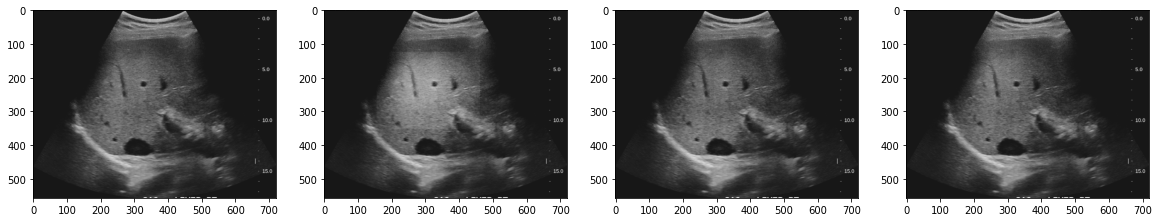

In [319]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img, vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,2)
print("Log for Augmentation 1 : ")
ax2.imshow(augmentCutSNR(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,3)
print("Log for Augmentation 2 : ")
ax2.imshow(augmentCutSNR(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(1,4,4)
print("Log for Augmentation 3 : ")
ax2.imshow(augmentCutSNR(img), vmin = -0.1, cmap = 'gray')

In [331]:
# Based on https://gist.github.com/fmder/e28813c1e8721830ff9c

import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    assert len(image.shape)==2

    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))
    
    return map_coordinates(image, indices, order=1).reshape(shape)

In [377]:
def generateAugmentation(img):
    aug = img.copy()
    blur_prob = random.random()
    if (blur_prob > 0.75):
        aug = augmentCutBlur(aug, text = False)

    noise_prob = random.random()
    if (noise_prob > 0.25):
        aug = augmentCutNoise(aug, text = False)
    else:
        aug = augmentCutDenoise(aug, text = False)
    intensity_prob = random.random()
    if (intensity_prob > 0.25):
        aug = augmentCutSNR(aug, text = False)

    rot_prob = random.random()
    if (rot_prob > 0.25):
        aug = augmentFlipRotate(aug, text = False)
    complete_blur_prob = random.random()
    if (complete_blur_prob > 0.25):
        aug = augmentCompleteBlurNoiseSNR(aug, text = False)
    complete_brightness_contrast = random.random()
    if (complete_brightness_contrast > 0.25):
        aug = augmentCompleteBrightnessContrast(aug, text = False)
    
    if (blur_prob > 0.75):
        aug = augmentCutBlur(aug, text = False)

    noise_prob = random.random()
    if (noise_prob > 0.25):
        aug = augmentCutNoise(aug, text = False)
    else:
        aug = augmentCutDenoise(aug, text = False)
    intensity_prob = random.random()
    if (intensity_prob > 0.25):
        aug = augmentCutSNR(aug, text = False)

    elastic_defomation_num = random.randint(0, 2)
    for i in range(elastic_defomation_num):
        aug = elastic_transform(aug, 20, 5)
    
    scaler = MinMaxScaler()
    scaler.fit(aug.flatten().reshape(-1, 1))
    aug = scaler.transform(aug.flatten().reshape(-1, 1)).reshape((len(aug), len(aug[0])))

    return aug

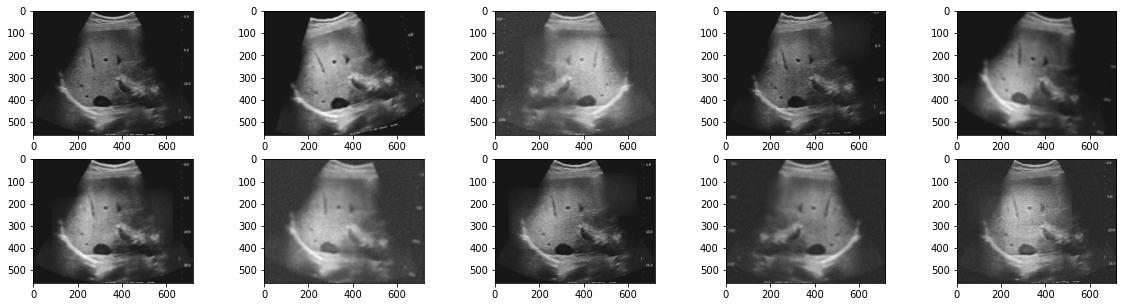

In [381]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)
ax1 = fig.add_subplot(2,5,1)
ax1.imshow(img, vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(2,5,2)
ax2.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(2,5,3)
ax2.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(2,5,4)
ax2.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(2,5,5)
ax2.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(2,5,6)
ax2.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(2,5,7)
ax2.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(2,5,8)
ax2.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(2,5,9)
ax2.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')
ax2 = fig.add_subplot(2,5,10)
ax2.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')

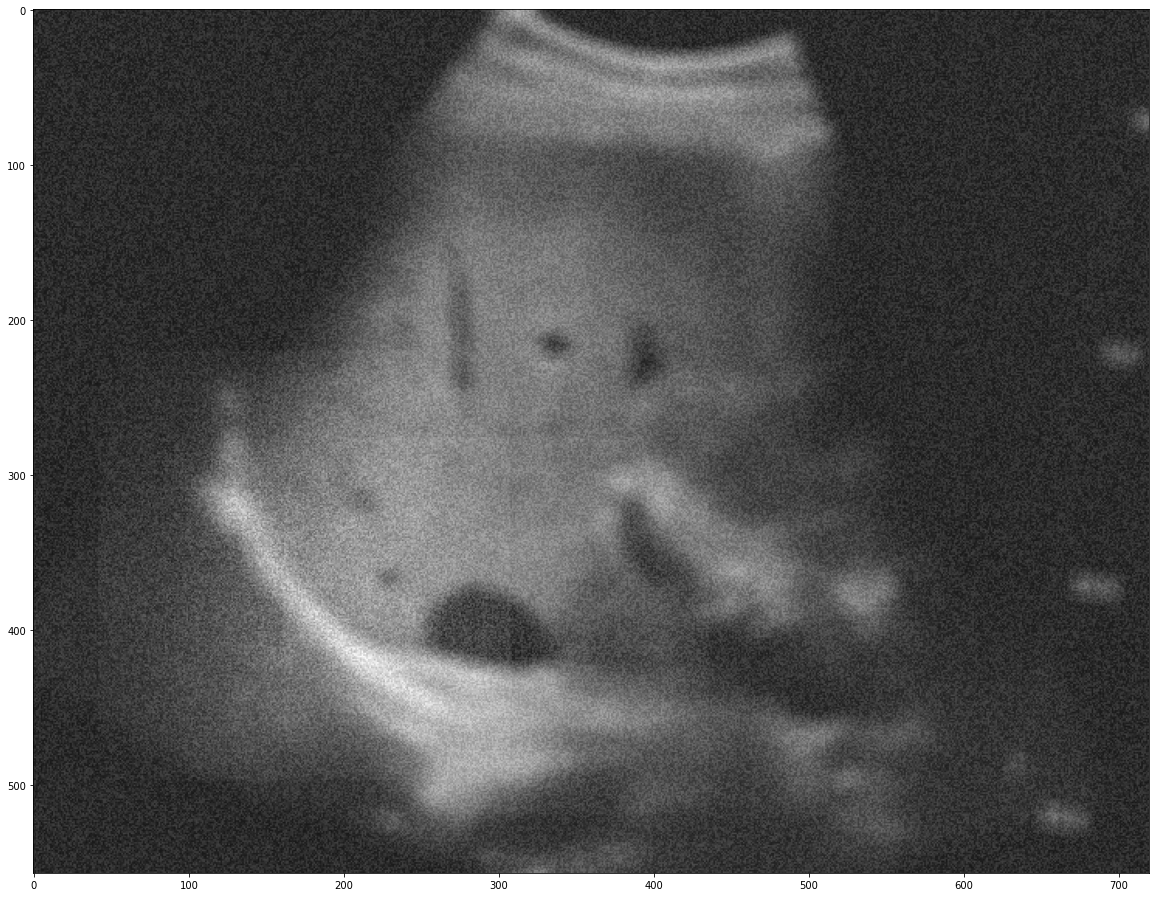

In [380]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(generateAugmentation(img), vmin = -0.1, cmap = 'gray')